### IMPORT FILES

In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot  as plt


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
import lightgbm as lgb


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model


In [13]:
"""Boston House Price dataset has 14 features and their description is given as follows:

CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per dollar 10,000.
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000's"""

"Boston House Price dataset has 14 features and their description is given as follows:\n\nCRIM per capita crime rate by town\nZN proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS proportion of non-retail business acres per town\nCHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX nitric oxides concentration (parts per 10 million)\nRM average number of rooms per dwelling\nAGE proportion of owner-occupied units built prior to 1940\nDIS weighted distances to five Boston employment centres\nRAD index of accessibility to radial highways\nTAX full-value property-tax rate per dollar 10,000.\nPTRATIO pupil-teacher ratio by town\nB 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT % lower status of the population\nMEDV Median value of owner-occupied homes in $1000's"

In [2]:
File ='housing.csv'
name = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B-1000','LSTAT','MEDV(target)']
df= pd.read_csv(File,encoding='latin-1',delim_whitespace=True,names=name)
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,MEDV(target)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### EDA

In [3]:
df.isnull().any()
df.shape
# type(df)

(506, 14)

In [4]:
df.duplicated().sum()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,MEDV(target)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,MEDV(target)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [283]:
# df[['MEDV(target)','LSTAT']].describe()

### DATA VISUALISATION

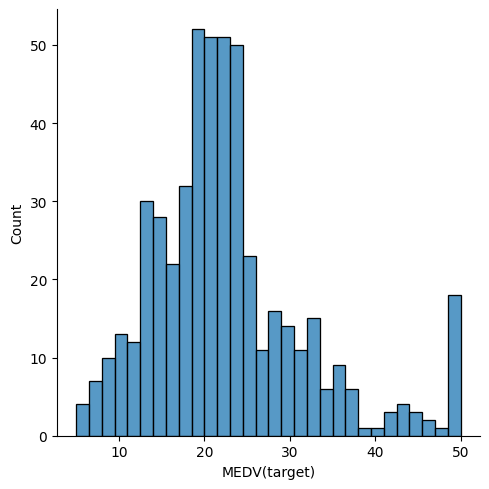

In [6]:
# count is frequency
sns.displot(df['MEDV(target)'], bins=30, edgecolor='black')

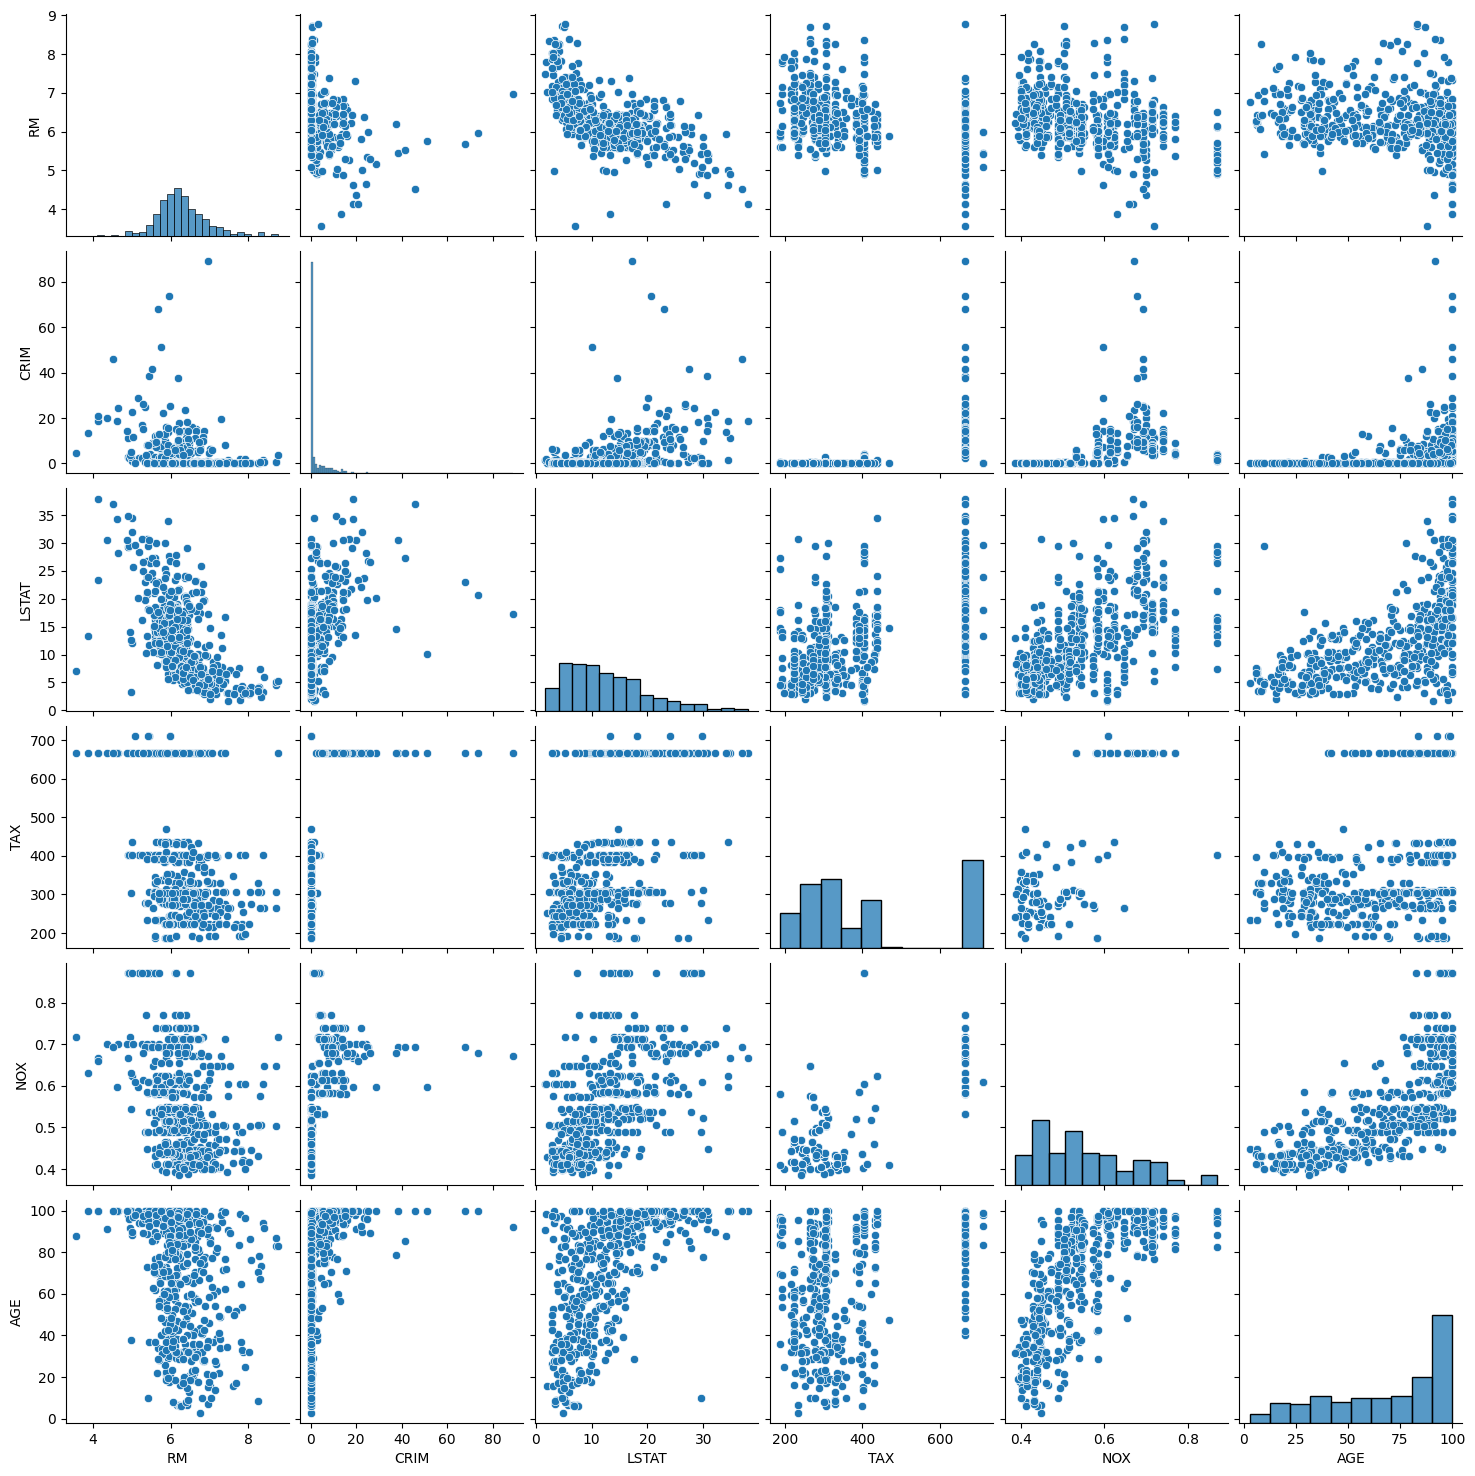

In [7]:
# Pair plot for selected features
selected_features = ['RM', 'CRIM', 'LSTAT', 'TAX', 'NOX', 'AGE']
sns.pairplot(df[selected_features])


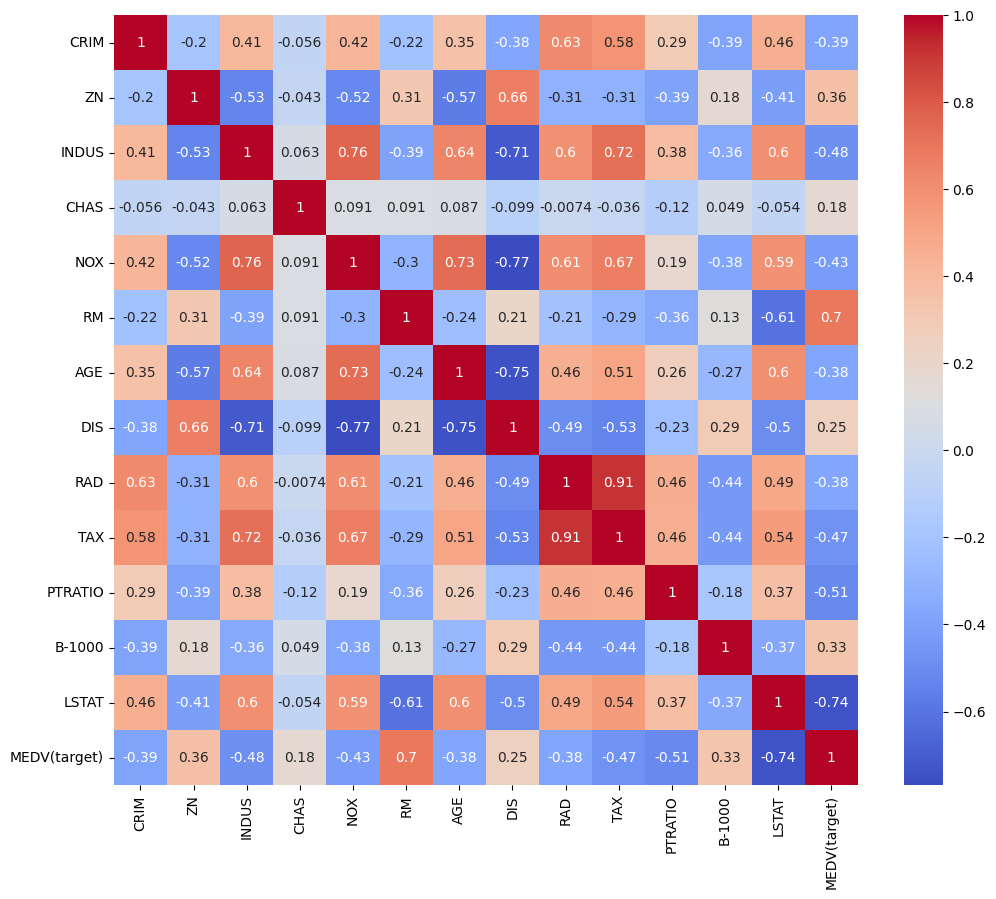

In [10]:
# correlation matrix using heatmap 
corelation_matirx=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corelation_matirx,annot=True,cmap='coolwarm')
plt.show()

In [287]:
#  "LSTAT" might be a better choice for building a predictive model.
#  Its strong negative correlation with the target variable suggests a more evident and direct relationship,
#  making it a potentially powerful predictor for predicting home values. 


## FEATURE SELECTION

In [11]:
# get absolute value of the correlation
cor_target= abs(corelation_matirx['MEDV(target)'])
# select highly relavant or correlated featured (threhsold>0.2)
rel_feature=cor_target[cor_target>0.2]
# collect the name of the feature
name_feature= [feature for feature ,value in rel_feature.iteritems()]
# drop the target coloumn
name_feature.remove("MEDV(target)")

print(name_feature)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B-1000', 'LSTAT']


In [12]:
x= df[name_feature].values
y=df['MEDV(target)'].values
x.shape
y.shape

(506,)

In [290]:
scale= StandardScaler()
X= scale.fit_transform(x)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Evaluation

In [292]:
results_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R-squared'])


In [293]:
def evaluate_model(model, x_test, y_test,model_name,n_splits=5,random_state=None):
    """
    Evaluate a regression model's performance using various metrics.
    
    Parameters:
    model (object): The trained regression model.
    x_test (array-like): Test features.
    y_test (array-like): True target values.
    model_name (str): Name of the model for DataFrame.
    n_splits (int): Number of folds for cross-validation.
    random_state: Random seed for reproducibility.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    r2_scores = []
    global evaluation_df  # To access and modify the global DataFrame
    for train_idx, test_idx in kf.split(x):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        mse_scores.append(mean_squared_error(y_test, y_pred))
        rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_mae = np.mean(mae_scores)
    avg_r2 = np.mean(r2_scores)
    
    print("Mean Squared Error:", avg_mse)
    print("Root Mean Squared Error:", avg_rmse)
    print("Mean Absolute Error:", avg_mae)
    print("R-squared:", avg_r2)
 
    # Append results to the DataFrame
    global results_df
    new_row = {'Model': model_name, 'MSE': avg_mse, 'RMSE': avg_rmse, 'MAE': avg_mae, 'R-squared': avg_r2}

    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    


In [294]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model
evaluate_model(lr, X_test, y_test,'LinearRegression')

Mean Squared Error: 24.46724508446419
Root Mean Squared Error: 4.913376763474615
Mean Absolute Error: 3.4231287734417024
R-squared: 0.7079328005417741


In [295]:
r_boost=RandomForestRegressor()
r_boost.fit(X_train, y_train)

# Evaluate the model
evaluate_model(r_boost, X_test, y_test,'Random_Forest')

Mean Squared Error: 11.573818264317612
Root Mean Squared Error: 3.392353953075041
Mean Absolute Error: 2.3082822947000587
R-squared: 0.857413777404924


In [296]:
decT=DecisionTreeRegressor()
decT.fit(X_train,y_train)

evaluate_model(decT,X_test,y_test,'Decision_Tree')

Mean Squared Error: 20.90880741603572
Root Mean Squared Error: 4.514697256438462
Mean Absolute Error: 3.047689768976898
R-squared: 0.7274585490173044


In [297]:
Knr=KNeighborsRegressor()
Knr.fit(X_train,y_train)

evaluate_model(Knr,X_test,y_test,'KNeighbors')

Mean Squared Error: 38.14904184818481
Root Mean Squared Error: 6.151464569950289
Mean Absolute Error: 4.350382450009707
R-squared: 0.5427044605655837


## XGBOOST

In [298]:
X_boost=xgb.XGBRegressor()
X_boost.fit(X_train,y_train)

evaluate_model(X_boost,X_test,y_test,'XGBoost')

Mean Squared Error: 9.379328229621226
Root Mean Squared Error: 3.0443604942512885
Mean Absolute Error: 2.13364033860666
R-squared: 0.8800644248337262


In [299]:
lg_boost=lgb.LGBMRegressor()
lg_boost.fit(X_train,y_train)

evaluate_model(lg_boost,X_test,y_test,'LGB')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 12
[LightGBM] [Info] Start training from score 22.796535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [300]:
cat_boost=CatBoostRegressor(verbose= False)
cat_boost.fit(X_train,y_train)

evaluate_model(cat_boost,X_test,y_test,'CatBoost')

Mean Squared Error: 9.158857728891405
Root Mean Squared Error: 2.9119056441420907
Mean Absolute Error: 1.9634950553987842
R-squared: 0.8968623641922588


In [301]:
gb_boost=GradientBoostingRegressor()
gb_boost.fit(X_train,y_train)

evaluate_model(gb_boost,X_test,y_test,'Gradient_Boosting')

Mean Squared Error: 8.881710930601486
Root Mean Squared Error: 2.960985121027537
Mean Absolute Error: 2.1154825692838997
R-squared: 0.8916924445292199


In [302]:
results_df
## the best model is Only the Gradient Boosting Regressor because of the Mean Square error is very low
# and the Low valuue of the Root Mean square error and Mean absolute error and
# high value of the R-Squared

,Model,MSE,RMSE,MAE,R-squared
0,LinearRegression,24.467245,4.913377,3.423129,0.707933
1,Random_Forest,11.573818,3.392354,2.308282,0.857414
2,Decision_Tree,20.908807,4.514697,3.047690,0.727459
3,KNeighbors,38.149042,6.151465,4.350382,0.542704
4,XGBoost,9.379328,3.044360,2.133640,0.880064
5,LGB,10.919477,3.265164,2.189976,0.867403
6,CatBoost,9.158858,2.911906,1.963495,0.896862
7,Gradient_Boosting,8.881711,2.960985,2.115483,0.891692


In [303]:
"""Mean Squared Error (MSE):
The MSE measures the average of the squared differences between the predicted values and
the true target values. It penalizes larger errors more heavily,
which makes it sensitive to outliers.
A lower MSE indicates better model performance.

Root Mean Squared Error (RMSE):
The RMSE is the square root of the MSE and provides an estimate of the average magnitude 
of the errors. It's in the same unit as the target variable and is easier to interpret.
Like the MSE, a lower RMSE indicates better performance.

Mean Absolute Error (MAE):
The MAE calculates the average absolute differences between predicted values and true 
target values. It is less sensitive to outliers than the MSE, as it doesn't square the
errors. A lower MAE indicates better performance.

R-squared (R²):
The R-squared value represents the proportion of the variance in the dependent variable
 (target) that's explained by the independent variables (features) in the model. It ranges
from 0 to 1, where 0 indicates that the model explains none of the variance, and 1 indicates
 that the model explains all of it. A higher R-squared indicates a better fit to the data."""

"Mean Squared Error (MSE):\nThe MSE measures the average of the squared differences between the predicted values and\nthe true target values. It penalizes larger errors more heavily,\nwhich makes it sensitive to outliers.\nA lower MSE indicates better model performance.\n\nRoot Mean Squared Error (RMSE):\nThe RMSE is the square root of the MSE and provides an estimate of the average magnitude \nof the errors. It's in the same unit as the target variable and is easier to interpret.\nLike the MSE, a lower RMSE indicates better performance.\n\nMean Absolute Error (MAE):\nThe MAE calculates the average absolute differences between predicted values and true \ntarget values. It is less sensitive to outliers than the MSE, as it doesn't square the\nerrors. A lower MAE indicates better performance.\n\nR-squared (R²):\nThe R-squared value represents the proportion of the variance in the dependent variable\n (target) that's explained by the independent variables (features) in the model. It ranges

### Neura network


In [304]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build a neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with no activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Epoch 1/100
13/13 - 0s - loss: 600.0218 - 484ms/epoch - 37ms/step
Epoch 2/100
13/13 - 0s - loss: 555.9882 - 16ms/epoch - 1ms/step
Epoch 3/100
13/13 - 0s - loss: 505.8418 - 17ms/epoch - 1ms/step
Epoch 4/100
13/13 - 0s - loss: 441.5378 - 15ms/epoch - 1ms/step
Epoch 5/100
13/13 - 0s - loss: 355.8922 - 16ms/epoch - 1ms/step
Epoch 6/100
13/13 - 0s - loss: 257.0756 - 15ms/epoch - 1ms/step
Epoch 7/100
13/13 - 0s - loss: 165.3372 - 15ms/epoch - 1ms/step
Epoch 8/100
13/13 - 0s - loss: 102.3975 - 14ms/epoch - 1ms/step
Epoch 9/100
13/13 - 0s - loss: 68.0047 - 14ms/epoch - 1ms/step
Epoch 10/100
13/13 - 0s - loss: 51.8949 - 12ms/epoch - 935us/step
Epoch 11/100
13/13 - 0s - loss: 39.8667 - 13ms/epoch - 1ms/step
Epoch 12/100
13/13 - 0s - loss: 32.8965 - 13ms/epoch - 1000us/step
Epoch 13/100
13/13 - 0s - loss: 29.0684 - 13ms/epoch - 1ms/step
Epoch 14/100
13/13 - 0s - loss: 26.0946 - 13ms/epoch - 974us/step
Epoch 15/100
13/13 - 0s - loss: 24.5372 - 13ms/epoch - 1ms/step
Epoch 16/100
13/13 - 0s - loss: 

In [305]:
import pickle
pickle.dump(cat_boost,open('Cat_boost.pkl','wb'))